# QR code challenge

In this notebook, we generate QR codes with the help of [PyQRCode](http://pythonhosted.org/PyQRCode/). We create what you might call a syntetic dataset of QR images, i.e. the messages are random strings and the images come directly from a QR generator. 


We make use of the image processing capabilities of [scikit-image](http://scikit-image.org/) to rescale and transform QR code images. Check the website to see what other cool effects you can add to your QR code images.



## Deep learning challenges

The QR dataset can be of interest to beginning deep learning practitioners.
- Exposure to image processing
- Easy entrance: QR codes are designed to be read my machine
- Not a heavy problem, so no GPU required
- Different architectures possible / needed
- Problem can be modified easily

Here are some neural network architectures that can be used
- Fully connected neural network (How do you deal with messages of varying size?)
- Convolutional network (Can you make the network more efficient?)
- Recurrent neural networks (Can you deal with messages of varying size?)
- Attention mechanism? (Can you deal with input images of varying size?)
- Compression (What is the smallest network you can get working?)

And some more questions you may consider
- Can you achieve 100% accuracy on a test set?
- Can you make your network resilient to distortions?
- What is the minimal number of original data points you need to train your network?
- Can you give the QR codes an artistic touch, and build a decoder that deals with that?


## Example code

Below you see several code examples involving the generation of QR codes and datasets of QR codes.

### Dependencies

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import string
import pyqrcode
import pandas as pd
from qrset import random_messages, ALPHABET, generate_messages, \
     generate_png, generate_messages_png, load_qr_set,\
     generate_qr_array
from IPython.display import Image
from skimage import data
from skimage.transform import resize
DATA_FOLDER = 'data'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### QR Codes with Python

With QR, you can encode small messages and long messages:

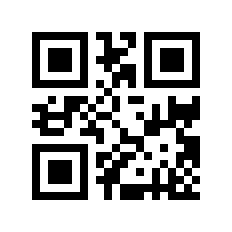

In [23]:
short_code = pyqrcode.create('hi')
short_code.png('small_qr.png', scale=8)
Image('small_qr.png')

A QR messages can contain up to a few thousend characters. The number of characters depends on the QR version, on the amount of error correction used, and on the type of data encoded. This is an example of a longer message:

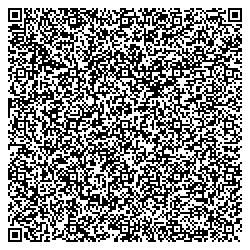

In [24]:
newsgroup = "The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper 'Newsweeder: Learning to filter netnews,' though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering."
long_code = pyqrcode.create(newsgroup)
long_code.png('small_qr.png', scale=2)
Image('small_qr.png')

### Encoding messages

The PyQRCode module implements various ways to encode QR codes. It offers serveral image formats like `png`, `svg`, and `eps`, and it supports a text format:

In [25]:
short_code.text()

'00000000000000000000000000000\n00000000000000000000000000000\n00000000000000000000000000000\n00000000000000000000000000000\n00001111111011011011111110000\n00001000001001001010000010000\n00001011101001110010111010000\n00001011101011100010111010000\n00001011101001011010111010000\n00001000001000111010000010000\n00001111111010101011111110000\n00000000000001000000000000000\n00000010111010101100010010000\n00001100110100100001011110000\n00000111101011000101011110000\n00001100100100100011110100000\n00000111001110010011001000000\n00000000000010011100001110000\n00001111111000100100100110000\n00001000001011011010001110000\n00001011101010110000101010000\n00001011101001100101010100000\n00001011101011100001011010000\n00001000001001011111110100000\n00001111111001011101011110000\n00000000000000000000000000000\n00000000000000000000000000000\n00000000000000000000000000000\n00000000000000000000000000000\n'

### Random messages

For supervised learning, we will need a large collection of annotated QR codes. This colleciton we will use to train  the learning algorithm. We generate syntetic messages as random strings from an alphabet. These messages are then used to generate QR code images. 

In [26]:
print(ALPHABET)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
random_messages(4, 20, ALPHABET)

['H_$|', 'Sv]-x@q(Vu(EyXN^', '-lowr\\rp!n$Yn', 'Ri).s,J']

### Write a dataset of syntetic QR code images to disk

If you want to use the syntetic QR code dataset with a language other then Python, it may be helpfull to save it to disk. Here is how you can generate dataset of QR codes using the QRSet module:

In [28]:
generate_messages_png(1000, 50, DATA_FOLDER + '/1Ksize50', variable_length=False)

In [29]:
# generate_messages_png(10000, 50, DATA_FOLDER + '/10Ksize50', variable_length=False)

As you will notice, these statements take quite some time to finish. This are not verry effiecient. If you are using Python, it is recommended to use generaters. See one of the sections below.


Note that the random string messages generated here are of fixed size (50 characters). You can vary the size of the messages, but then the png images that are generated will vary in size too (number of pixels is lager for longer messages). You can adapt the code of `qrset.py` to include rescaling of the png images to fixed dimensions, if you want to.

### Read QR code image dataset from disk

Allthough slow, you might want to read images from disk with Python. Here is a code example.

In [32]:
input_dir = DATA_FOLDER + '/1Ksize50'
data = load_qr_set(input_dir)

In [33]:
data.head()

,y,x
0,"DZiu$=/\kvxFWcqi""","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,"kt+h${%M%<vR""[HZ@y]YFC?g#rw*xvWzK","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,YkiFh-=K>M`zVlyd*`WxQ[xyWrWJA@bEVjFi,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,>ZJoV@FC`*vMga,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,]ppwMTi?Y]qrZHHj!u&%qC*{;XE,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


## Create a dataset of syntetic QR code images on the fly

You can save a lot of time by skipping the write+read to disk. When you use Python for processing a dataset of QR images, generators are the preferred method.

The function `generate_qr_array` returns a numpy array of fixed shape. In order to arrive at a fixed shape, all images are resized to a pre-defined shape, in this case 30 by 30 pixels. 

Check section fit_generator in [keras sequential model documentation](https://keras.io/models/sequential/)

In [34]:
arr = generate_qr_array('hi', image_shape=(30,30))

In [35]:
arr.shape

(30, 30)

In [36]:
arr[0:2]

array([[ 0.96694444,  0.98333333,  0.98333333,  0.98333333,  0.98333333,
         0.98333333,  0.98333333,  0.98333333,  0.98333333,  0.98333333,
         0.98333333,  0.98333333,  0.98333333,  0.98333333,  0.98333333,
         0.98333333,  0.98333333,  0.98333333,  0.98333333,  0.98333333,
         0.98333333,  0.98333333,  0.98333333,  0.98333333,  0.98333333,
         0.98333333,  0.98333333,  0.98333333,  0.98333333,  0.96694444],
       [ 0.98333333,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  0.98333333]])

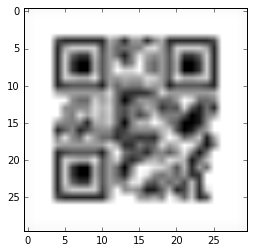

In [38]:
plt.imshow(arr, cmap=plt.cm.gray)
# Todo: provide options to imshow to display a sharp image

### Generator for Keras

This is a start for writing your own generator, to be used with Keras.

In [144]:
message_length = 100
alphabet = ALPHABET
def qr_factory(message_length, alphabet=ALPHABET, variable_length=True, image_shape=(100,100)):
    while 1:
        message = random_messages(1, message_length, alphabet=alphabet, variable_length=True)
        arr = generate_qr_array('hi', image_shape=image_shape)
        yield (arr.flatten()[np.newaxis,:], np.array(message[0]))

In [145]:
generator = qr_factory((message_length))

In [146]:
for m in generator:
    print(m)
    break

(array([[ 0.416025,  0.603075,  0.645   , ...,  0.645   ,  0.603075,
         0.416025]]), array('Y.~p&Rs>.iIe"eU>rQH|\':\'Nv]$+~%?VOX~Tc+!C.zOQ,]])-.,@}a#VtaWOBlndbvJLMKQNc#DJ$mW>\'.\\T+', 
      dtype='<U85'))


In [147]:
m

(array([[ 0.416025,  0.603075,  0.645   , ...,  0.645   ,  0.603075,
          0.416025]]),
 array('Y.~p&Rs>.iIe"eU>rQH|\':\'Nv]$+~%?VOX~Tc+!C.zOQ,]])-.,@}a#VtaWOBlndbvJLMKQNc#DJ$mW>\'.\\T+', 
       dtype='<U85'))

## Neural networks with Keras

The deep learning framework Keras provides an easy interface to get started with deep learning. If offers several types of layers, and it has some handy routines for pre-processing. For image processing, have a look at [Keras image pre-processing documentation](https://keras.io/preprocessing/image/).


In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop

### Challenge: fully connected neural network
This is the fully connected layer that was presented in the deep learning tutorial of our last meetup. You made it work with hand written images. Now you have to get it work with QR codes. There are some obstacle, though.

To begin, the current loss function expect categorial input. You may want to re-think both the architecture, the target format and the loss function. After adapting the model, the generator also needs to be update.


Challenge: make this architecture learn to read QR code images. 

2. Choose the right loss function
3. Adapt the architecture if needed
1. Repair the QR code generator from the above section
3. Train the model

In [151]:
generator = qr_factory((message_length), image_shape=(30,30))

In [148]:
model = Sequential()
model.add(Dense(512, input_shape=(900,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [152]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [153]:
model.fit_generator(generator, 1, 1)

Epoch 1/1


Exception: Error when checking model target: expected activation_15 to have 2 dimensions, but got array with shape ()